## EDA of Dataset

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

## Load data

In [11]:
dataset = pd.read_csv('dataset.csv', 
                      names = ['Sentiment', 'Id', 'Date', 'Flag', 'User', 'Tweet'],
                      encoding='latin-1')
dataset.head()

,Sentiment,Id,Date,Flag,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
print("Total tweets in the dataset: {} Million".format(dataset.shape[0]/1000000.0))

Total tweets in the dataset: 1.6 Million


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
Sentiment    1600000 non-null int64
Id           1600000 non-null int64
Date         1600000 non-null object
Flag         1600000 non-null object
User         1600000 non-null object
Tweet        1600000 non-null object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


## Column Analysis
Use all columns except for "Id, Flag, User" for sentiment analysis.

### Sentiment Column
Distributed between the positive and negative sentiment values: 
We can see the dataset is evenly distributed between positive (4) and negative (0) tweets.

No handles with labels found to put in legend.


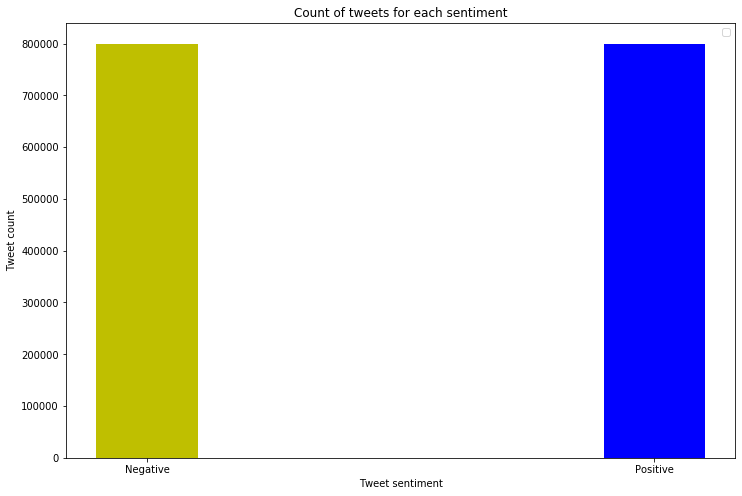

In [12]:
# Returned the "sentiment value" in descending order [4, 0]
class_count = dataset['Sentiment'].value_counts()

plt.figure(figsize = (12, 8))
plt.xticks([4, 0], ['Positive', 'Negative'])
plt.xticks([4, 0])
plt.bar(x = class_count.keys(), 
        height = class_count.values, 
        color = ['b', 'y'])
plt.xlabel("Tweet sentiment")
plt.ylabel("Tweet count")
plt.title("Count of tweets for each sentiment")
plt.legend()

### Date Column
Extract the month from each tweet and plot the count of tweets for each month.
The maximum tweets were grabbed in the June 2009.

In [15]:
dataset['Month'] = dataset['Date'].apply(lambda date: date.split(' ')[1])
months_count = dataset['Month'].value_counts()
months_count.head()

Jun    923608
May    576367
Apr    100025
Name: Month, dtype: int64

Text(0.5, 1.0, 'Tweets during months of 2009')

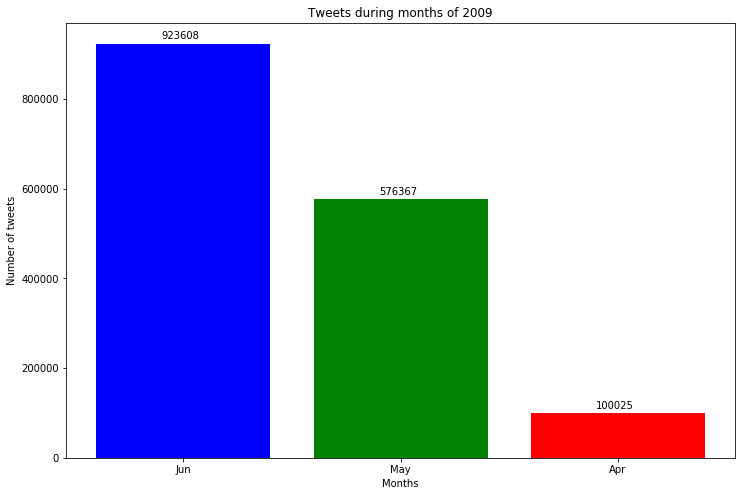

In [14]:
plt.figure(figsize = (12, 8))
plt.bar(['Jun', 'May', 'Apr'], months_count.values, 
          color = ['b', 'g', 'r'])
for i, v in enumerate(months_count.values):
    plt.text(i - 0.1, v + 10000, str(v))
plt.xlabel('Months')
plt.ylabel('Number of tweets')
plt.title('Tweets during months of 2009')

### Tweet Column

In [16]:
# Take a look at the first 2 tweets
print(dataset['Tweet'][0])
print(dataset['Tweet'][1])

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!


Combine all tweets based on their sentiment and create their respective wordclouds

In [17]:
# Combine tweets
positive_tweets = ' '.join(dataset[dataset['Sentiment'] == 4]['Tweet'].str.lower())
negative_tweets = ' '.join(dataset[dataset['Sentiment'] == 0]['Tweet'].str.lower())

Text(0.5, 1.0, 'Positive tweets Wordcloud')

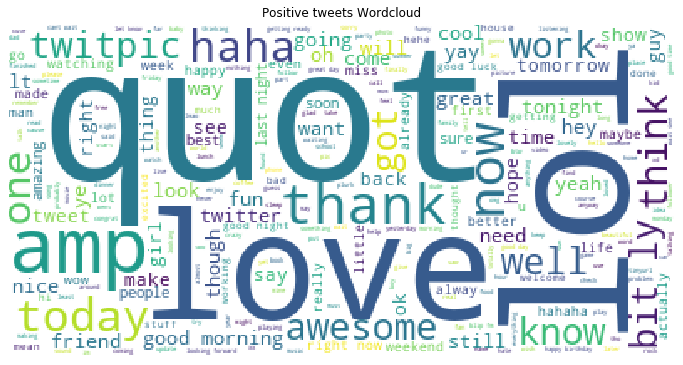

In [18]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(positive_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Positive tweets Wordcloud")

Text(0.5, 1.0, 'Negative tweets Wordcloud')

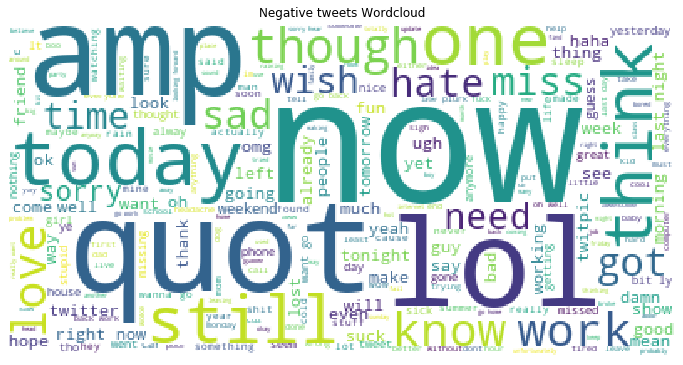

In [19]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(negative_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Negative tweets Wordcloud")

### Summary:
- From the word clouds above, it appears that the top words for each tweet sentiment are very similar such as lol, and quot. 
- We will need to create a neural network that can classify the sentiments even with such high similarity of words.